#### 聚类

In [1]:
# beer dataset
import pandas as pd
beer = pd.read_csv('./beer_data.txt', sep=' ')
beer

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [2]:
X = beer[['calories', 'sodium', 'alcohol', 'cost']]

#### K-means clustering

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)

In [4]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2, 0],
      dtype=int32)

In [5]:
beer['cluster'] = km.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2
9,Budweiser_Light,113,8,3.7,0.40,0,0
11,Coors_Light,102,15,4.1,0.46,0,0
8,Miller_Lite,99,10,4.3,0.43,0,0
19,Schlitz_Light,97,7,4.2,0.47,0,0
4,Heineken,152,11,5.0,0.77,1,1
1,Schlitz,151,19,4.9,0.43,1,1
2,Lowenbrau,157,15,0.9,0.48,1,1
0,Budweiser,144,15,4.7,0.43,1,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,1
6,Augsberger,175,24,5.5,0.40,1,1


In [6]:
from pandas.plotting import scatter_matrix
%matplotlib inline

cluster_centers = km.cluster_centers_
cluster_centers_2 = km2.cluster_centers_

In [7]:
beer.groupby("cluster").mean(numeric_only=True)

,calories,sodium,alcohol,cost,cluster2
cluster,,,,,
0,102.75,10.0,4.075000,0.440000,0.0
1,150.00,17.0,4.521429,0.520714,1.0
2,70.00,10.5,2.600000,0.420000,0.0


In [8]:
beer.groupby("cluster2").mean(numeric_only=True)

,calories,sodium,alcohol,cost,cluster
cluster2,,,,,
0,91.833333,10.166667,3.583333,0.433333,0.666667
1,150.000000,17.000000,4.521429,0.520714,1.000000


In [9]:
centors = beer.groupby("cluster").mean(numeric_only=True).reset_index()

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [11]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

Text(0, 0.5, 'Alcohol')

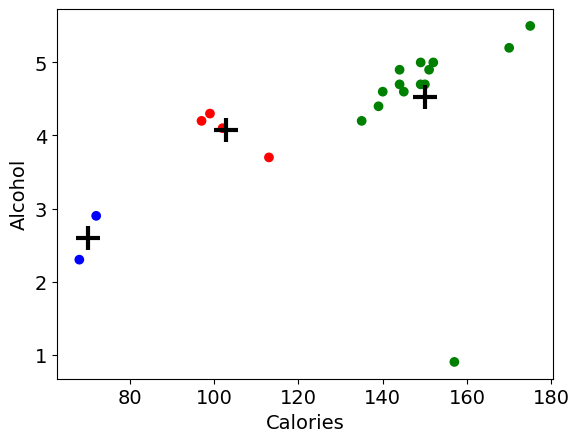

In [12]:
plt.scatter(beer['calories'], beer['alcohol'], c=colors[beer['cluster']])
plt.scatter(centors.calories, centors.alcohol, linewidths=3, marker='+', s=300, c='black')
plt.xlabel('Calories')
plt.ylabel('Alcohol')

Text(0.5, 0.98, 'With 3 centroids initialized')

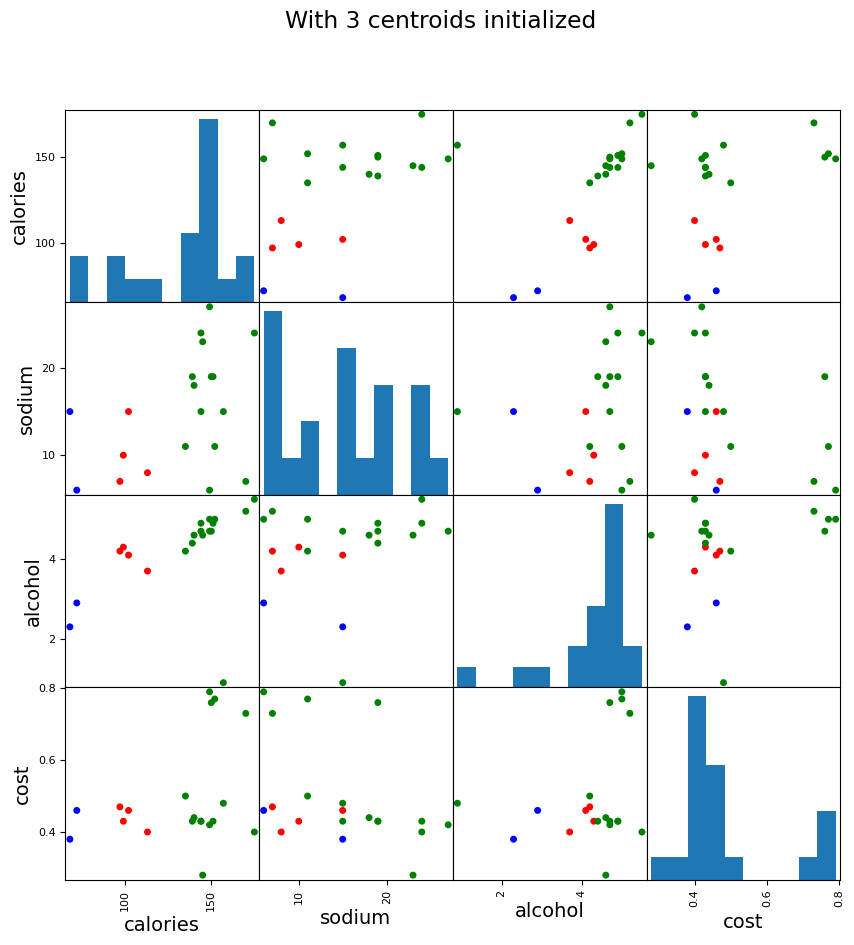

In [13]:
scatter_matrix(beer[['calories', 'sodium', 'alcohol', 'cost']], s=100, alpha=1, c=colors[beer['cluster']], figsize=(10, 10))
plt.suptitle("With 3 centroids initialized")

Text(0.5, 0.98, 'With 2 centroids initialized')

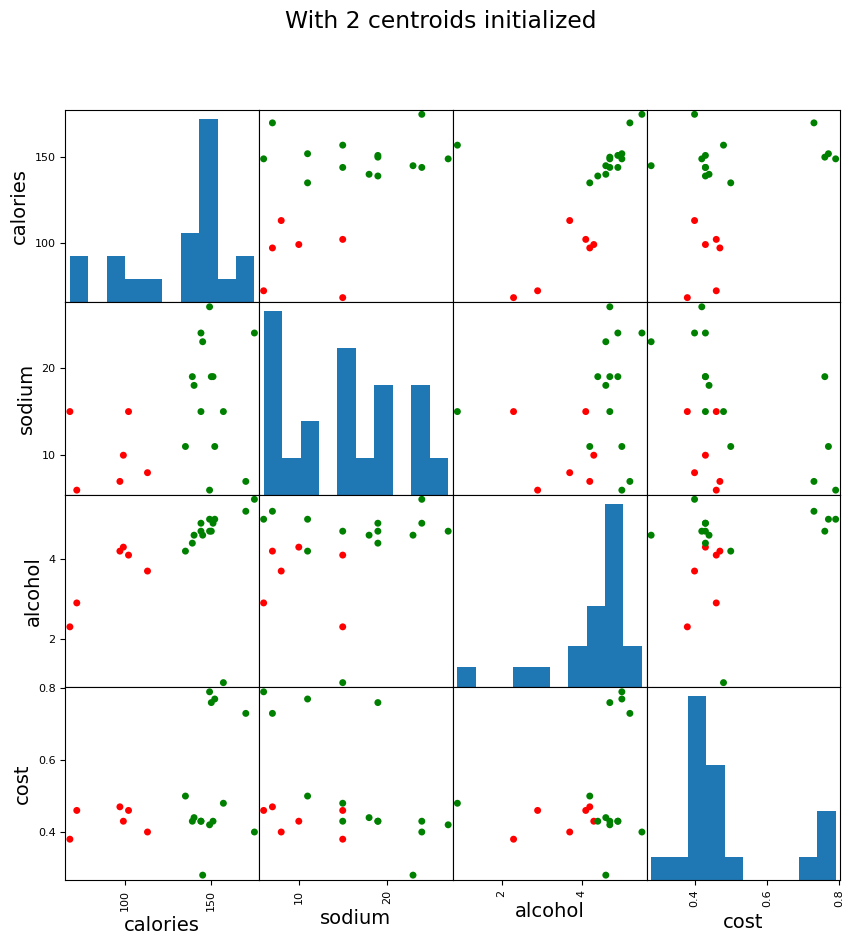

In [14]:
scatter_matrix(beer[['calories','sodium','alcohol','cost']],s=100, alpha=1, c=colors[beer['cluster2']], figsize=(10,10))
plt.suptitle('With 2 centroids initialized')

#### 数据标准化或归一化

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_scaler

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [16]:
km = KMeans(n_clusters=3).fit(X_scaler)

In [17]:
beer['scaled_cluster'] = km.labels_
beer.sort_values('scaled_cluster')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
3,Kronenbourg,170,7,5.2,0.73,1,1,0
4,Heineken,152,11,5.0,0.77,1,1,0
13,Becks,150,19,4.7,0.76,1,1,0
14,Kirin,149,6,5.0,0.79,1,1,0
6,Augsberger,175,24,5.5,0.40,1,1,1
5,Old_Milwaukee,145,23,4.6,0.28,1,1,1
1,Schlitz,151,19,4.9,0.43,1,1,1
0,Budweiser,144,15,4.7,0.43,1,1,1
10,Coors,140,18,4.6,0.44,1,1,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,1,1


In [18]:
beer.groupby('scaled_cluster').mean(numeric_only=True)

,calories,sodium,alcohol,cost,cluster,cluster2
scaled_cluster,,,,,,
0,155.250,10.750,4.9750,0.7625,1.00,1.00
1,148.375,21.125,4.7875,0.4075,1.00,1.00
2,105.375,10.875,3.3250,0.4475,0.75,0.25


array([[<Axes: xlabel='calories', ylabel='calories'>,
        <Axes: xlabel='sodium', ylabel='calories'>,
        <Axes: xlabel='alcohol', ylabel='calories'>,
        <Axes: xlabel='cost', ylabel='calories'>],
       [<Axes: xlabel='calories', ylabel='sodium'>,
        <Axes: xlabel='sodium', ylabel='sodium'>,
        <Axes: xlabel='alcohol', ylabel='sodium'>,
        <Axes: xlabel='cost', ylabel='sodium'>],
       [<Axes: xlabel='calories', ylabel='alcohol'>,
        <Axes: xlabel='sodium', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='cost', ylabel='alcohol'>],
       [<Axes: xlabel='calories', ylabel='cost'>,
        <Axes: xlabel='sodium', ylabel='cost'>,
        <Axes: xlabel='alcohol', ylabel='cost'>,
        <Axes: xlabel='cost', ylabel='cost'>]], dtype=object)

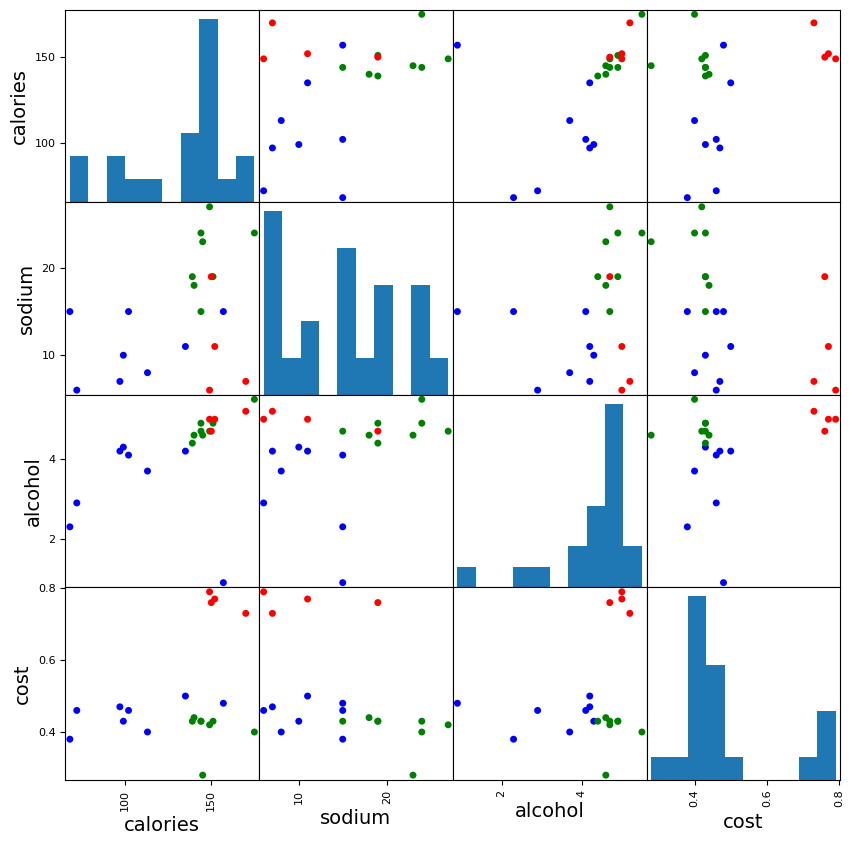

In [19]:
scatter_matrix(X, c=colors[beer.scaled_cluster], alpha=1, figsize=(10, 10), s=100)

#### 聚类评估: 轮廓系数 (Silhouette Coefficient)

$$
s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
$$

$$
s(i) = \begin{cases} 
1 - \frac{a(i)}{b(i)}, & \text{if } a(i) < b(i) \\
0, & \text{if } a(i) = b(i) \\
\frac{b(i)}{a(i)} - 1, & \text{if } a(i) > b(i)
\end{cases}
$$

- 计算样本 \( i \) 到同簇其他样本的平均距离 \( a_i \)。\( a_i \) 越小，说明样本 \( i \) 越应该被聚类到该簇。将 \( a_i \) 称为样本 \( i \) 的簇内不相似度。
- 计算样本 \( i \) 到其他某簇 \( C_j \) 的所有样本的平均距离 \( b_{ij} \)，称为样本 \( i \) 与簇 \( C_j \) 的不相似度。定义为样本 \( i \) 的簇间不相似度:
  \[ b_i = \min\{b_{i1}, b_{i2}, \ldots, b_{ik}\} \]
- \( s_i \) 接近 1，则说明样本 \( i \) 聚类合理。
- \( s_i \) 接近 -1，则说明样本 \( i \) 更应该分类到另外的簇。
- \( s_i \) 近似为0，则说明样本 \( i \) 在两个簇的边界上。

In [20]:
from sklearn import metrics

score = metrics.silhouette_score(X, beer.cluster)
score_scaled = metrics.silhouette_score(X, beer.scaled_cluster)
print(score, score_scaled)

0.6731775046455796 0.1797806808940007


In [21]:
scores = []
for k in range(2, 20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels=labels)
    scores.append(score)

scores

[np.float64(0.6917656034079486),
 np.float64(0.4353155283041132),
 np.float64(0.5857040721127795),
 np.float64(0.39795307968774635),
 np.float64(0.4174145570048754),
 np.float64(0.43776116697963124),
 np.float64(0.41415901051960285),
 np.float64(0.30197402360263864),
 np.float64(0.3303959210854438),
 np.float64(0.3228320073008364),
 np.float64(0.3459775237127248),
 np.float64(0.27970894633759236),
 np.float64(0.30707782144770296),
 np.float64(0.2736836031737978),
 np.float64(0.2849514001174898),
 np.float64(0.23498077333071996),
 np.float64(0.16040218538260367),
 np.float64(0.08423051380151177)]

Text(0, 0.5, 'Sihouette Score')

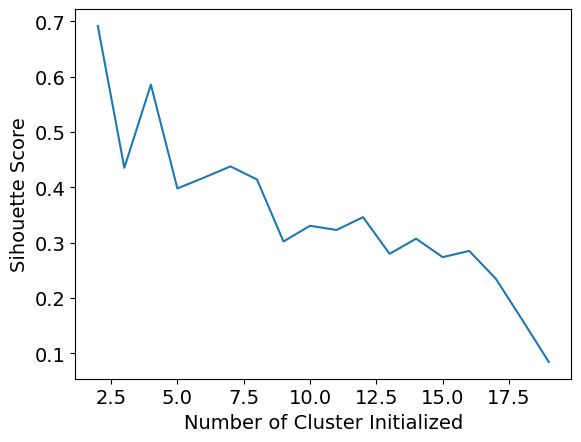

In [22]:
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Cluster Initialized")
plt.ylabel("Sihouette Score")

#### DBSCAN 聚类

In [23]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=10, min_samples=2).fit(X)

In [24]:
labels = db.labels_

In [25]:
beer['cluster_db'] = labels
beer.sort_values('cluster_db')

,name,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster,cluster_db
3,Kronenbourg,170,7,5.2,0.73,1,1,0,-1
6,Augsberger,175,24,5.5,0.40,1,1,1,-1
9,Budweiser_Light,113,8,3.7,0.40,0,0,2,-1
1,Schlitz,151,19,4.9,0.43,1,1,1,0
2,Lowenbrau,157,15,0.9,0.48,1,1,2,0
4,Heineken,152,11,5.0,0.77,1,1,0,0
5,Old_Milwaukee,145,23,4.6,0.28,1,1,1,0
0,Budweiser,144,15,4.7,0.43,1,1,1,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1,1,1,0
10,Coors,140,18,4.6,0.44,1,1,1,0


In [26]:
beer.groupby('cluster_db').mean(numeric_only=True)

,calories,sodium,alcohol,cost,cluster,cluster2,scaled_cluster
cluster_db,,,,,,,
-1,152.666667,13.000000,4.800000,0.510000,0.666667,0.666667,1.000000
0,146.250000,17.250000,4.383333,0.513333,1.000000,1.000000,0.916667
1,99.333333,10.666667,4.200000,0.453333,0.000000,0.000000,2.000000
2,70.000000,10.500000,2.600000,0.420000,2.000000,0.000000,2.000000


array([[<Axes: xlabel='calories', ylabel='calories'>,
        <Axes: xlabel='sodium', ylabel='calories'>,
        <Axes: xlabel='alcohol', ylabel='calories'>,
        <Axes: xlabel='cost', ylabel='calories'>],
       [<Axes: xlabel='calories', ylabel='sodium'>,
        <Axes: xlabel='sodium', ylabel='sodium'>,
        <Axes: xlabel='alcohol', ylabel='sodium'>,
        <Axes: xlabel='cost', ylabel='sodium'>],
       [<Axes: xlabel='calories', ylabel='alcohol'>,
        <Axes: xlabel='sodium', ylabel='alcohol'>,
        <Axes: xlabel='alcohol', ylabel='alcohol'>,
        <Axes: xlabel='cost', ylabel='alcohol'>],
       [<Axes: xlabel='calories', ylabel='cost'>,
        <Axes: xlabel='sodium', ylabel='cost'>,
        <Axes: xlabel='alcohol', ylabel='cost'>,
        <Axes: xlabel='cost', ylabel='cost'>]], dtype=object)

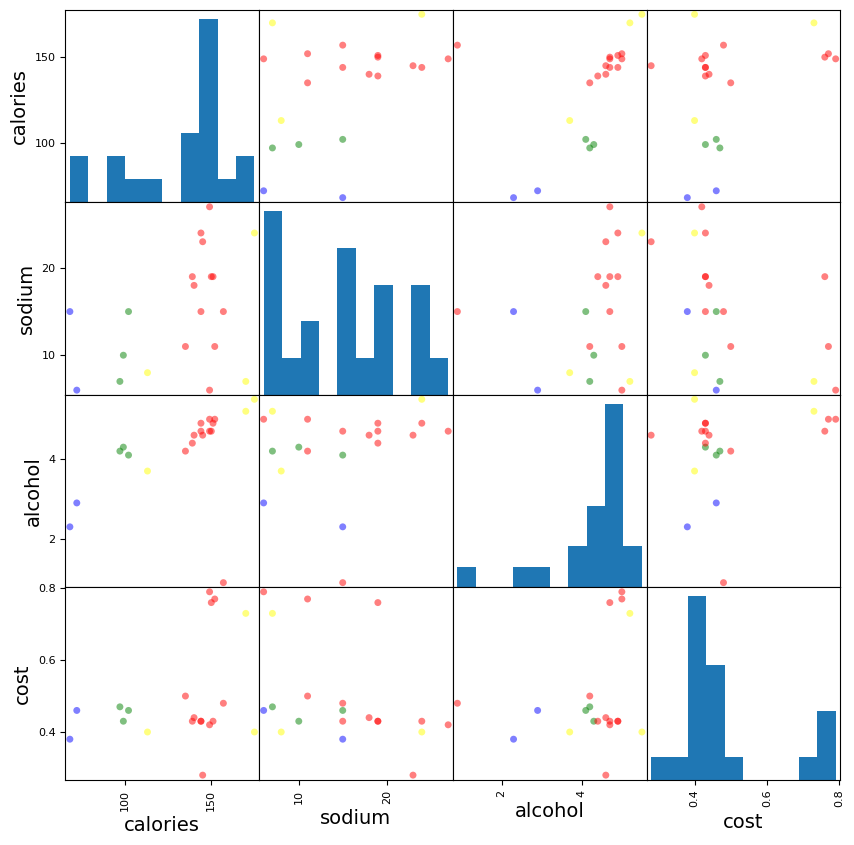

In [27]:
scatter_matrix(X, c=colors[beer.cluster_db], figsize=(10,10), s=100)